<a href="https://colab.research.google.com/github/pvihung/CS133_sp25_datafiles/blob/main/Colab_A11_complicated_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with complicated dataset

Your name:

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

blast_results_url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv'

with urllib.request.urlopen(blast_results_url) as f:
  for i in range(20):
    line = f.readline().decode('utf-8').strip()
    print(f"{i + 1}: {line}")

1: # blastp,,,,,,,,,,,,,,,
2: # Iteration: 0,,,,,,,,,,,,,,,
3: # Query: YP_220550.1 NADH dehydrogenase subunit 1 (mitochondrion) [Mus musculus domesticus],,,,,,,,,,,,,,,
4: # RID: 9SW3UNUT015,,,,,,,,,,,,,,,
5: # Database: nr,,,,,,,,,,,,,,,
6: "# Fields: query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score, % positives, bonds, publications",,,,,,,,,,,,,,,
7: # 100 hits found,,,,,,,,,,,,,,,
8: YP_220550.1,NP_904328.1,100,318,0,0,1,318,1,318,0,629,100," 1,487 ",9,
9: YP_220550.1,AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100," 17,947 ",47,
10: YP_220550.1,YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100," 12,106 ",13,
11: YP_220550.1,ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69," 2,319 ",41,
12: YP_220550.1,AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100," 18,964 ",3,
13: YP_220550.1,AEN03421.1,99.686,318,1,0,1,318,1,318,0,626,99.69," 12,444 ",39,
14: YP_220550.1,6G2J_H,100,317,0,0,2,318,2,318,0,62

In [38]:
Fields = ['query acc.ver','subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '% positives', 'bonds', 'publications']
blast_results = pd.read_csv(blast_results_url,
                            skiprows=7,
                            comment='#',
                            na_values='-',
                            sep=',',
                            usecols=Fields,
                            names=Fields,
                            index_col='subject acc.ver',
                            thousands=','
                            )
blast_results.drop(columns='query acc.ver', inplace=True)
blast_results

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABX45285.1,92.767,318,23,0,1,318,1,318,0,551,97.48,17348,6.0
ASP44815.1,93.375,317,21,0,1,317,1,317,0,551,96.85,7105,19.0
YP_009414156.1,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37.0


### Question 2
What is the average number of publications?

In [39]:
blast_results.info()
## we can see that dtype of publications is object instead of numeric

blast_results.publications.unique()
# '-' should be change using na_values

blast_results = pd.read_csv(blast_results_url,
                            skiprows=7,
                            comment='#',
                            na_values=['-'],
                            sep=',',
                            usecols=Fields,
                            names=Fields,
                            index_col='subject acc.ver',
                            thousands=','
                            )
blast_results.drop(columns='query acc.ver', inplace=True)
blast_results.info()
print('Average number of publications:',round(blast_results.publications.mean(),2).item())

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, NP_904328.1 to AGS12808.1
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   % identity        100 non-null    float64
 1   alignment length  100 non-null    int64  
 2   mismatches        100 non-null    int64  
 3   gap opens         100 non-null    int64  
 4   q. start          100 non-null    int64  
 5   q. end            100 non-null    int64  
 6   s. start          100 non-null    int64  
 7   s. end            100 non-null    int64  
 8   evalue            100 non-null    int64  
 9   bit score         100 non-null    int64  
 10  % positives       100 non-null    float64
 11  bonds             100 non-null    int64  
 12  publications      97 non-null     float64
dtypes: float64(3), int64(10)
memory usage: 10.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, NP_904328.1 to AGS12808.1
Data columns (total 13 columns):
 #   Col

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [41]:
blast_results.bonds.unique()
index = blast_results[blast_results['bonds']>15000].index
print('subject acc.ver that has over 15,000 bonds:', index)

subject acc.ver that has over 15,000 bonds: Index(['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1',
       '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1',
       'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1',
       'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1',
       'ADD46492.1', 'YP_007025968.1', 'YP_009453806.1', 'YP_007024956.1',
       'ASM92364.1', 'YP_006073044.1', 'ASM92494.1', 'ADG95699.1',
       'YP_004891275.1', 'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1',
       'YP_009178854.1', 'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1',
       'ABX45285.1', 'YP_009414156.1', 'YP_009414363.1'],
      dtype='object', name='subject acc.ver')


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

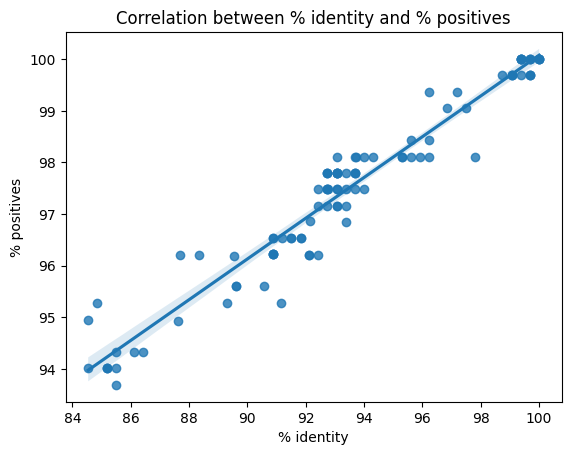

In [79]:
identity =blast_results['% identity'].unique()
positive = blast_results['% positives'].unique()
g=sns.regplot(x='% identity', y='% positives', data=blast_results)
plt.title('Correlation between % identity and % positives')
plt.show()

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [77]:
protein_file = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv'

with urllib.request.urlopen(protein_file) as response:
    for i in range(20):
        line = response.readline().decode('utf-8').strip()
        print(f"{i + 1}: {line}")
columns = ['Index','Protein', 'Protein source']
protein = pd.read_csv(
    protein_file,
    sep=',',
    skiprows=1,
    names=columns,
    usecols= columns,
    index_col='Index'
)
protein.info()

merged = blast_results.merge(protein, how='left', left_on='subject acc.ver', right_on='Protein')
merged

# Since we are using left merge, we will take everything in the left df and leave
# na in the right df, so depends on we want to keep na value or not
merged.drop(columns='Protein', inplace=True)
merged

1: ,Protein,Source
2: 0,NP_904328.1,RefSeq
3: 2,YP_220563.1,GenPept
4: 12,YP_002791042.1,GenPept
5: 13,YP_001686698.1,GenPept
6: 21,YP_009112408.1,GenPept
7: 22,YP_001876469.1,GenPept
8: 23,YP_009024853.1,GenPept
9: 24,YP_009092269.1,GenPept
10: 26,YP_009092074.1,GenPept
11: 27,YP_009450474.1,GenPept
12: 28,YP_009257679.1,GenPept
13: 29,YP_009092072.1,GenPept
14: 30,YP_004123270.1,GenPept
15: 31,YP_009092073.1,GenPept
16: 33,YP_009555274.1,GenPept
17: 34,ASM92897.1,ASM
18: 35,ASM93444.1,ASM
19: 36,YP_009414597.1,GenPept
20: 37,YP_009424345.1,GenPept
<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 98
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Protein         64 non-null     object
 1   Protein source  64 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein source
0,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,RefSeq
1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,NaN
2,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,GenPept
3,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0,NaN
4,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,92.767,318,23,0,1,318,1,318,0,551,97.48,17348,6.0,NaN
96,93.375,317,21,0,1,317,1,317,0,551,96.85,7105,19.0,NaN
97,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37.0,GenPept
98,85.174,317,47,0,1,317,1,317,0,551,94.01,18762,5.0,GenPept
